In [1]:
import pandas as pd
from flask import Flask, render_template, request
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns


In [2]:
#nltk.download('stopwords')

In [3]:
alay_dict = pd.read_csv(
    r"C:\Users\rahad\OneDrive\Documents\Binar Data Science\Challenge Gold Fix\Data\new_kamusalay.csv", 
    encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original',
                                      1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

In [2]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stopword = set(stopwords.words('indonesian'))

In [5]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


def clean(text):
    text = emoji_pattern.sub(r'', text)  # clean emoji
    text = re.sub(r'RT[\s]+', '', text)  # clean RT
    text = re.sub(r'\bn\b','',text)
    text = str(text).lower()
    text = re.sub(r"\$\w*", '', text)  # clean the crypto / stock tickers
    text = re.sub(r"#", "", text)  # clean hashtags
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('xd', '', text)
    text = re.sub('url', '', text)
    text = re.sub('user', '', text)
    text = ' '.join(
        [alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
    text = stemmer.stem(text)
    
#     text=" ".join(text)
    return text

In [6]:
app = Flask(__name__, template_folder=r"C:\Users\rahad\OneDrive\Documents\Binar Data Science\Challenge Gold Fix\Data")
@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "GET":
        return render_template("upload.html")
    elif request.method == "POST":
        csv_file = request.files.get("file")
        X_test = pd.read_csv(csv_file, encoding="latin-1")
        X_test['Tweet'] = X_test['Tweet'].apply(clean)
        converted_csv = X_test.to_csv(
            r"C:\Users\rahad\OneDrive\Documents\Binar Data Science\Challenge Gold Fix\Data/Data-Bersih.csv")
        converted_html = X_test.to_html()
        return converted_html, converted_csv

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


### EDA Data bersih

In [3]:
clean_df = pd.read_csv(r"C:\Users\rahad\OneDrive\Documents\Binar Data Science\Challenge Gold Fix\Data/Data-Bersih.csv",index_col="Unnamed: 0")
clean_df.Tweet.head()

0    cowok usaha lacak perhati gue lantas remeh per...
1    telat tau eluedan sarap gue gaul cigax jifla c...
2    kadang pikir percaya tuhan jatuh berkalikali k...
3                                  akun tau mata sipit
4                  kaum cebong kafir dongok dungu haha
Name: Tweet, dtype: object

In [4]:
clean_df.isnull().sum()

Tweet            66
HS                0
Abusive           0
HS_Individual     0
HS_Group          0
HS_Religion       0
HS_Race           0
HS_Physical       0
HS_Gender         0
HS_Other          0
HS_Weak           0
HS_Moderate       0
HS_Strong         0
dtype: int64

In [5]:
clean_df.dropna(inplace=True)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
HS_strength = clean_df[clean_df["HS"]==1]
HS_strength = HS_strength[["HS_Weak","HS_Moderate","HS_Strong"]]
HS_strength

,HS_Weak,HS_Moderate,HS_Strong
0,1,0,0
4,0,1,0
5,0,1,0
10,1,0,0
11,1,0,0
...,...,...,...
13157,1,0,0
13161,1,0,0
13162,0,1,0
13164,1,0,0


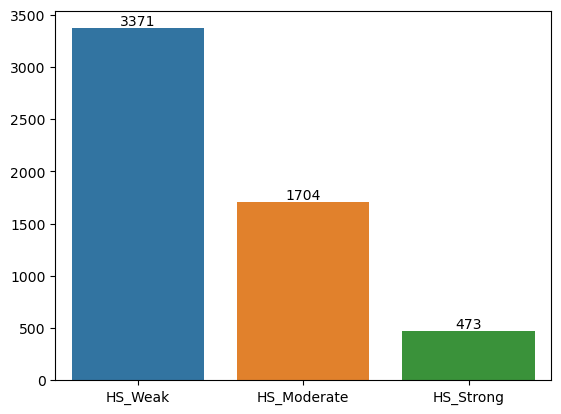

In [8]:
xbar = HS_strength.columns[:]
yval = HS_strength.value_counts()
ax = sns.barplot( x=xbar, y=yval)

for container in ax.containers:
    ax.bar_label(container)

In [9]:
HS_indgro = clean_df[clean_df["HS"]==1]
HS_indgro = HS_indgro[["HS_Individual","HS_Group"]]
HS_indgro

,HS_Individual,HS_Group
0,1,0
4,0,1
5,0,1
10,1,0
11,1,0
...,...,...
13157,1,0
13161,1,0
13162,0,1
13164,1,0


In [20]:
clean_df.HS.values

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

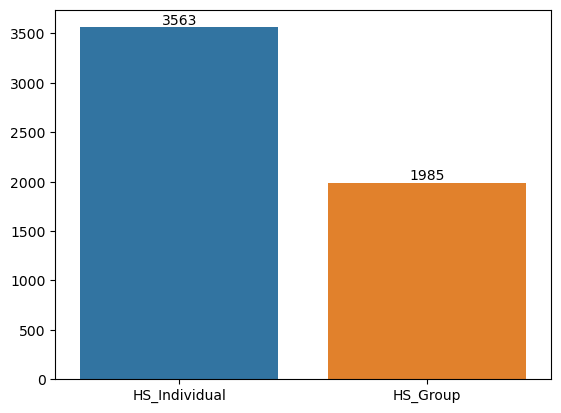

In [24]:
xbar = HS_indgro.columns
yval = HS_indgro.value_counts()

ax = sns.barplot(x=xbar, y=yval)
for container in ax.containers:
    ax.bar_label(container)

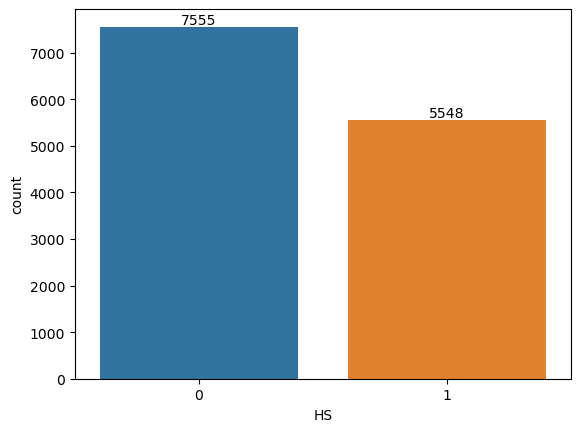

In [23]:
ax=sns.countplot(data=clean_df,x='HS')
for container in ax.containers:
    ax.bar_label(container)

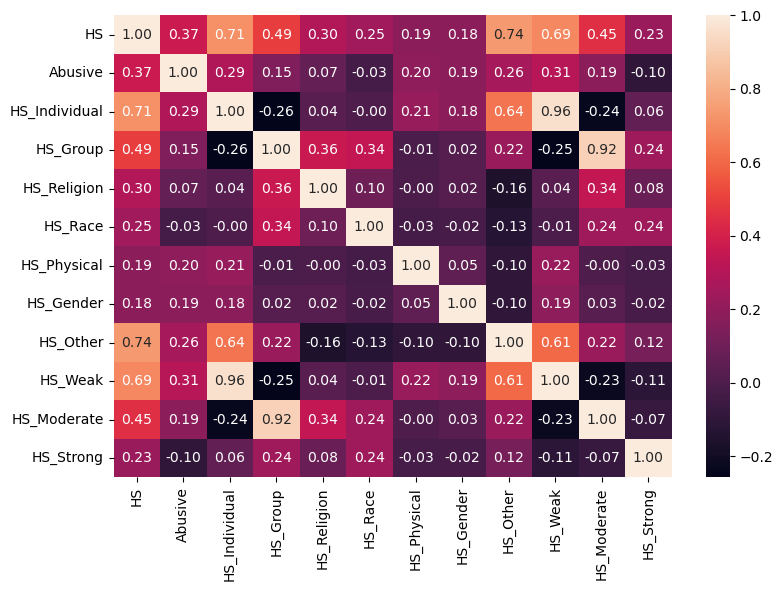

In [11]:
ax = plt.subplots(figsize=(9,6))
sns.heatmap(clean_df.corr(),annot=True,fmt='.2f',vmax=1)
plt.show()

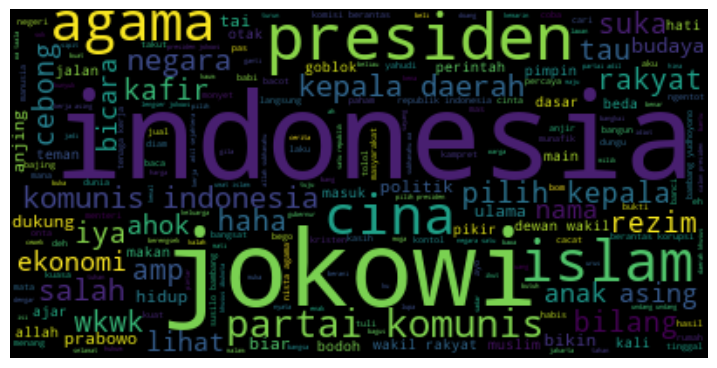

In [16]:
text = " ".join(i for i in clean_df["Tweet"])
text = re.sub(r'\byang\b','',text)
text = re.sub(r'\bya\b','',text)
text = re.sub(r'\bgue\b','',text)
text = re.sub(r'\btidak\b','',text)
text = re.sub(r'\bkamu\b','',text)
text = re.sub(r'\bsaja\b','',text)
text = re.sub(r'\borang\b','',text)
text = re.sub(r'\bsudah\b','',text)
text = re.sub(r'\bkalau\b','',text)
text = re.sub(r'\bsih\b','',text)
text = re.sub(r'\bkak\b','',text)
text = re.sub(r'\bitu\b','',text)
text = re.sub(r'\bnih\b','',text)
text = re.sub(r'\bbanget\b','',text)
text = re.sub(r'\bdengan\b','',text)
text = re.sub(r'\buser\b','',text)
text = re.sub(r'\bnya\b','',text)
text = re.sub(r'\bkayak\b','',text)
text = re.sub(r'\bpakai\b','',text)
text = re.sub('^n','',text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
df_abusive = clean_df[clean_df["Abusive"]==1]
df_abusive = df_abusive[["Tweet","Abusive"]]

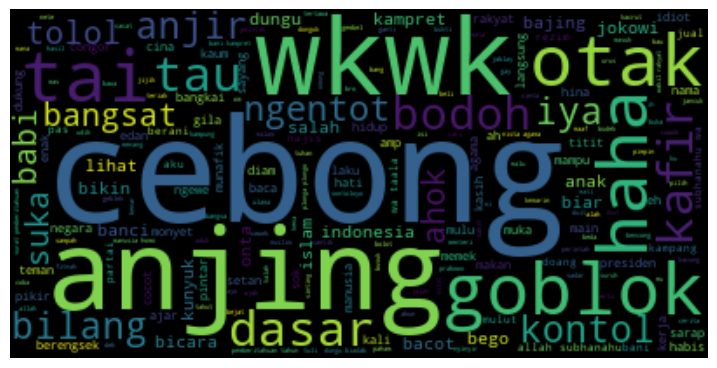

In [18]:
text = " ".join(i for i in df_abusive["Tweet"])
text = re.sub(r'\byang\b','',text)
text = re.sub(r'\bya\b','',text)
text = re.sub(r'\bgue\b','',text)
text = re.sub(r'\btidak\b','',text)
text = re.sub(r'\bkamu\b','',text)
text = re.sub(r'\bsaja\b','',text)
text = re.sub(r'\borang\b','',text)
text = re.sub(r'\bsudah\b','',text)
text = re.sub(r'\bkalau\b','',text)
text = re.sub(r'\bsih\b','',text)
text = re.sub(r'\bkak\b','',text)
text = re.sub(r'\bitu\b','',text)
text = re.sub(r'\bnih\b','',text)
text = re.sub(r'\bbanget\b','',text)
text = re.sub(r'\bdengan\b','',text)
text = re.sub(r'\buser\b','',text)
text = re.sub(r'\bnya\b','',text)
text = re.sub(r'\bkayak\b','',text)
text = re.sub(r'\bpakai\b','',text)
text = re.sub('^n','',text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
df_individual = clean_df[clean_df["HS_Individual"]==1]
df_individual = df_individual[["Tweet","HS_Individual"]]

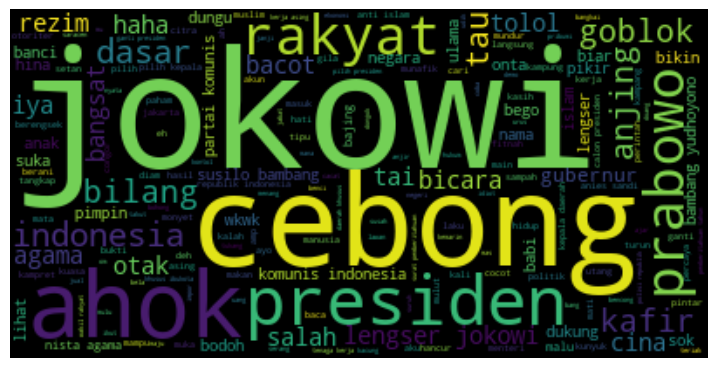

In [20]:
text = " ".join(i for i in df_individual["Tweet"])
text = re.sub(r'\byang\b','',text)
text = re.sub(r'\bya\b','',text)
text = re.sub(r'\bgue\b','',text)
text = re.sub(r'\btidak\b','',text)
text = re.sub(r'\bkamu\b','',text)
text = re.sub(r'\bsaja\b','',text)
text = re.sub(r'\borang\b','',text)
text = re.sub(r'\bsudah\b','',text)
text = re.sub(r'\bkalau\b','',text)
text = re.sub(r'\bsih\b','',text)
text = re.sub(r'\bkak\b','',text)
text = re.sub(r'\bitu\b','',text)
text = re.sub(r'\bnih\b','',text)
text = re.sub(r'\bbanget\b','',text)
text = re.sub(r'\bdengan\b','',text)
text = re.sub(r'\buser\b','',text)
text = re.sub(r'\bnya\b','',text)
text = re.sub(r'\bkayak\b','',text)
text = re.sub(r'\bpakai\b','',text)
text = re.sub('^n','',text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
df_strong = clean_df[clean_df["HS_Strong"]==1]
df_strong = df_strong[["Tweet","HS_Strong"]]

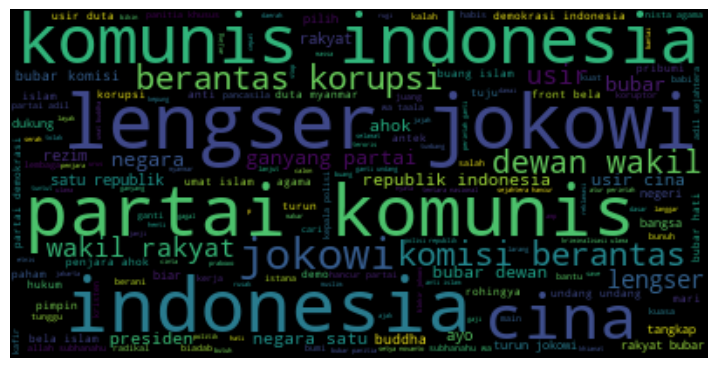

In [22]:
text = " ".join(i for i in df_strong["Tweet"])
text = re.sub(r'\byang\b','',text)
text = re.sub(r'\bya\b','',text)
text = re.sub(r'\bgue\b','',text)
text = re.sub(r'\btidak\b','',text)
text = re.sub(r'\bkamu\b','',text)
text = re.sub(r'\bsaja\b','',text)
text = re.sub(r'\borang\b','',text)
text = re.sub(r'\bsudah\b','',text)
text = re.sub(r'\bkalau\b','',text)
text = re.sub(r'\bsih\b','',text)
text = re.sub(r'\bkak\b','',text)
text = re.sub(r'\bitu\b','',text)
text = re.sub(r'\bnih\b','',text)
text = re.sub(r'\bbanget\b','',text)
text = re.sub(r'\bdengan\b','',text)
text = re.sub(r'\buser\b','',text)
text = re.sub(r'\bnya\b','',text)
text = re.sub(r'\bkayak\b','',text)
text = re.sub(r'\bpakai\b','',text)
text = re.sub('^n','',text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

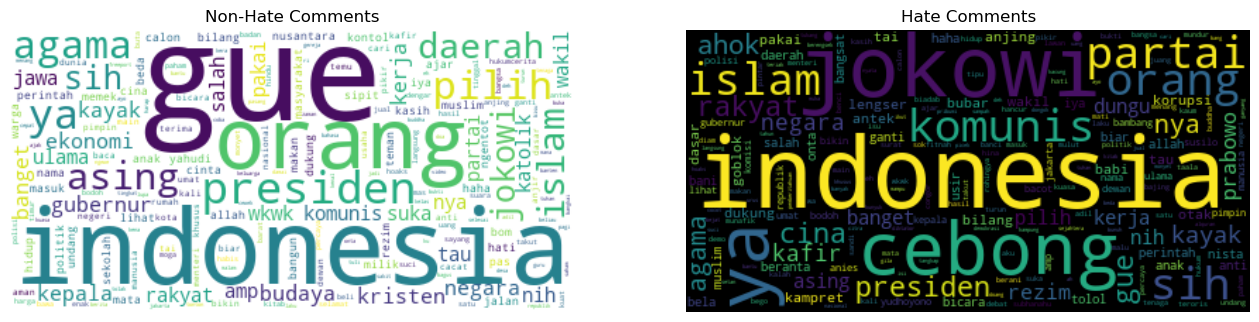

In [8]:
fig,axs=plt.subplots(1,2,figsize=(16,8))
text_pos = " ".join(clean_df["Tweet"][clean_df.HS == 0])
text_neg = " ".join(clean_df["Tweet"][clean_df.HS == 1])
train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(train_cloud_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

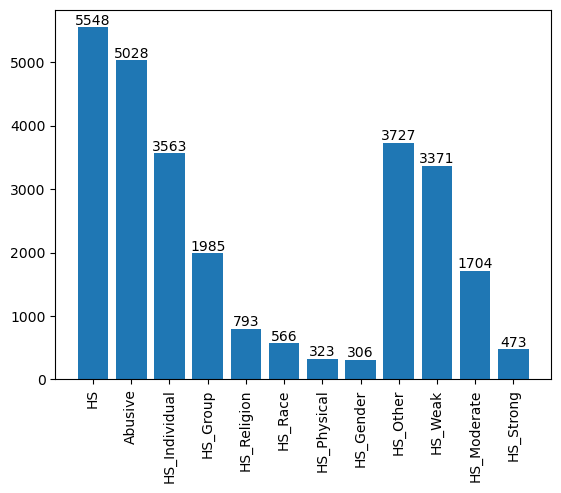

In [15]:
fig,ax = plt.subplots()
ax.bar(clean_df.columns[1:],(clean_df.iloc[:,1:]).sum())
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation="vertical")
plt.show()

In [23]:
#!pip install pathlib

Defaulting to user installation because normal site-packages is not writeable


In [24]:
from pathlib import Path
Path('Twit.db').touch()

In [25]:
import sqlite3
conn = sqlite3.connect('Twit.db',check_same_thread=False)
c = conn.cursor()

In [26]:
c.execute('CREATE TABLE IF NOT EXISTS TWHS (Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong)')
conn.commit()

In [27]:
clean_df.to_sql("qeqe",conn,if_exists='replace')

13103

In [28]:
df= pd.read_sql("SELECT * FROM qeqe",conn)

In [30]:
df= df.drop(columns='index')

In [7]:
clean_df.to_excel("Databersih_excel.xlsx")